<a href="https://colab.research.google.com/github/Kaibalya27/MNIST-classification/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.datasets import mnist
from keras.models import Sequential

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
x_train= x_train/255
x_test= x_test/255

In [34]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)

In [38]:
ANN=Sequential()
ANN.add(Flatten(input_shape=(28,28)))
ANN.add(Dense(128,activation='relu'))
ANN.add(Dense(10,activation='softmax'))
ANN.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
ANN.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2565 - accuracy: 0.9259 - val_loss: 0.1404 - val_accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1109 - accuracy: 0.9670 - val_loss: 0.0951 - val_accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0754 - accuracy: 0.9770 - val_loss: 0.0800 - val_accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0558 - accuracy: 0.9833 - val_loss: 0.0764 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.0747 - val_accuracy: 0.9758
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0774 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0748 - val_accuracy:

In [40]:
DNN=Sequential()
DNN.add(Flatten(input_shape=(28,28)))
DNN.add(Dense(128,activation='relu'))
DNN.add(BatchNormalization())
DNN.add(Dense(128,activation='relu'))
DNN.add(BatchNormalization())
DNN.add(Dense(64,activation='relu'))
DNN.add(BatchNormalization())
DNN.add(Dense(64,activation='relu'))
DNN.add(BatchNormalization())
DNN.add(Dense(10,activation='softmax'))
DNN.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
DNN.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2955 - accuracy: 0.9094 - val_loss: 0.1477 - val_accuracy: 0.9561
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1448 - accuracy: 0.9549 - val_loss: 0.0863 - val_accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1131 - accuracy: 0.9640 - val_loss: 0.0959 - val_accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0945 - accuracy: 0.9702 - val_loss: 0.0815 - val_accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0800 - accuracy: 0.9746 - val_loss: 0.0795 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0701 - accuracy: 0.9773 - val_loss: 0.0746 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0648 - accuracy: 0.9793 - val_loss: 0.0772 - val_accur

In [30]:
import kerastuner as kt

<ipython-input-30-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [31]:
def ann(hp):
  ANN=Sequential()
  ANN.add(Flatten(input_shape=(28,28)))
  for i in range(hp.Int('l',1,20)):
    ANN.add(Dense(hp.Int('u'+str(i),28,784), activation=hp.Choice('a'+str(i),values=['relu','tanh','sigmoid','softmax','elu','selu'])))
    ANN.add(Dropout(hp.Choice('D'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    ANN.add(BatchNormalization())
  ANN.add(Dense(10,activation='softmax'))
  ANN.compile(optimizer=hp.Choice('o',values=['adam','rmsprop','sgd','adagrad','nadam']),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return ANN

In [32]:
tuner=kt.RandomSearch(ann,objective='val_accuracy',max_trials=5,directory='project')
tuner.search(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Trial 5 Complete [00h 08m 27s]
val_accuracy: 0.732200026512146

Best val_accuracy So Far: 0.9760000109672546
Total elapsed time: 00h 35m 19s


In [33]:
model=tuner.get_best_models(num_models=1)[0]

In [35]:
model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),callbacks=[callback])

Epoch 1/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1239 - accuracy: 0.9718 - val_loss: 0.1848 - val_accuracy: 0.9748
Epoch 2/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1185 - accuracy: 0.9737 - val_loss: 0.1967 - val_accuracy: 0.9747
Epoch 3/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1063 - accuracy: 0.9760 - val_loss: 0.1815 - val_accuracy: 0.9766
Epoch 4/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1023 - accuracy: 0.9768 - val_loss: 0.1897 - val_accuracy: 0.9755
Epoch 5/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0960 - accuracy: 0.9778 - val_loss: 0.1818 - val_accuracy: 0.9770
Epoch 6/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0925 - accuracy: 0.9789 - val_loss: 0.1705 - val_accuracy: 0.9783
Epoch 7/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0909 - accuracy: 0.9791 - val_loss: 0.1660 - v

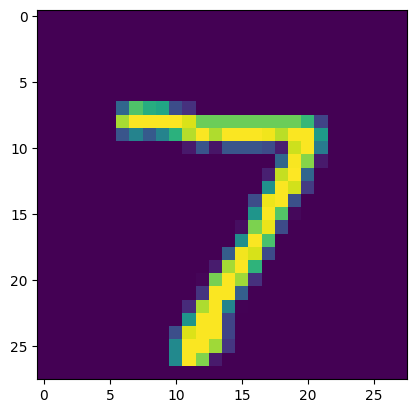

In [46]:
plt.imshow(x_test[0])

In [44]:
ANN.predict(x_test[0].reshape(1,28,28)).argmax()

1/1 [==============================] - 0s 83ms/step


7

In [45]:
y_test[0]

7

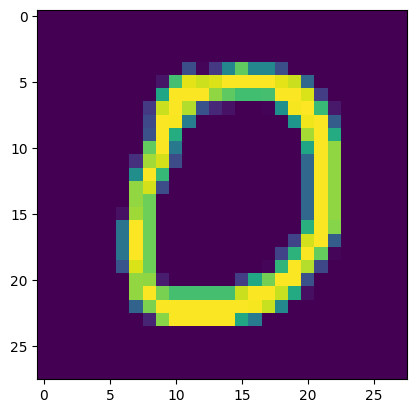

In [47]:
plt.imshow(x_test[10])

In [49]:
ANN.predict(x_test[10].reshape(1,28,28)).argmax()

1/1 [==============================] - 0s 86ms/step


0

In [50]:
y_test[10]

0